In [2]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/79/3d/02d5d3ed359498fec3abdf65407d3c07e3b8765af17464969055aaec5171/scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 330.3 kB/s eta 0:00:33
   ---------------------------------------- 0.0/10.6 MB 487.6 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 573.4 kB/s eta 0:00:19
   ---------------------------------------- 0.1/10.6 MB 654.9 kB/s eta 0:00:17
    --------------------------------------- 0.2/10.6 MB 748.1 kB/s eta 0:00:14
    --------------------------------------- 0.2/10.6 MB 692.9 kB/s eta 0:00:16
   - -------------------------------------- 0.3/10.6 MB 896.4 kB/s eta 0:00:12
   - -------------------------------------- 0.3/10.6 MB 803.7 kB/s eta 0:00:13
   - -------------------------------------- 0.4/10.6 MB 857.5 kB/s eta 0:00:12
 

In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv(r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression()

In [6]:
X=df[['highway-mpg']]
Y=df['price']


In [7]:
lm.fit(X,Y)


LinearRegression()

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
df[['highway-mpg','price']]

,highway-mpg,price
0,27,13495.0
1,27,16500.0
2,26,16500.0
3,30,13950.0
4,22,17450.0
...,...,...
196,28,16845.0
197,25,19045.0
198,23,21485.0
199,27,22470.0


In [11]:
Yhat[195:]

array([20345.17153508, 15414.77126514, 17879.97140011, 19523.43815675,
       16236.50464347, 17879.97140011])

In [12]:
lm.intercept_

38423.305858157386

In [13]:
lm.coef_

array([-821.73337832])

In [14]:
lm1=LinearRegression()
lm1

LinearRegression()

In [15]:
X=df[['engine-size']]
Y=df['price']
lm1.fit(X,Y)


LinearRegression()

In [16]:
Yhat=lm1.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [17]:
df[['engine-size','price']]

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
196,141,16845.0
197,141,19045.0
198,173,21485.0
199,145,22470.0


In [18]:
lm1.coef_

array([166.86001569])

In [19]:
lm1.intercept_

-7963.338906281049

In [20]:
lm2=LinearRegression()
lm2

LinearRegression()

In [21]:
Z=df[['highway-mpg','horsepower','curb-weight','engine-size']]
lm2.fit(Z,df['price'])


LinearRegression()

In [22]:
lm2.coef_

array([36.05748882, 53.49574423,  4.70770099, 81.53026382])

In [23]:
lm2.intercept_

-15806.62462632923

In [24]:
lm3=LinearRegression()
T=df[['normalized-losses','highway-mpg']]
lm3.fit(T,df['price'])


LinearRegression()

In [25]:
lm3.intercept_

38201.313272457264

In [26]:
lm3.coef_

array([   1.49789586, -820.45434016])

In [27]:
import seaborn as sns

(0.0, 48167.8347356018)

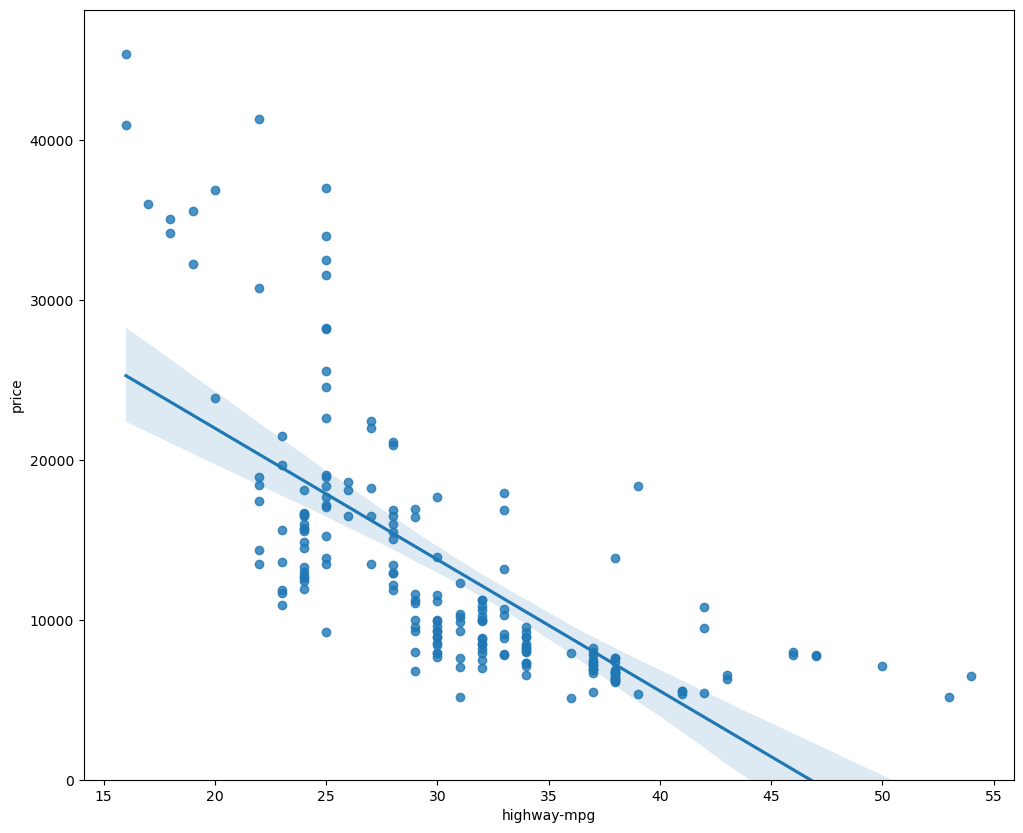

In [28]:
plt.figure(figsize=(12,10))
sns.regplot(x='highway-mpg',y='price', data=df)
plt.ylim(0,)

(0.0, 47414.1)

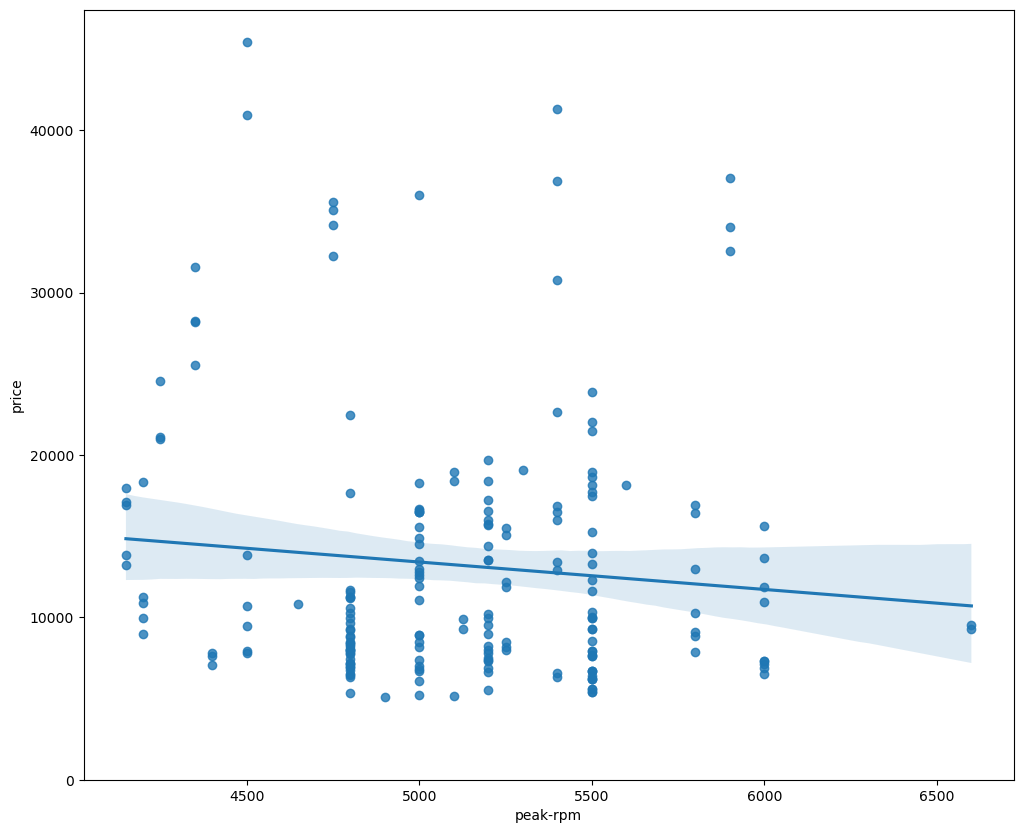

In [29]:
plt.figure(figsize=(12,10))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [30]:
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


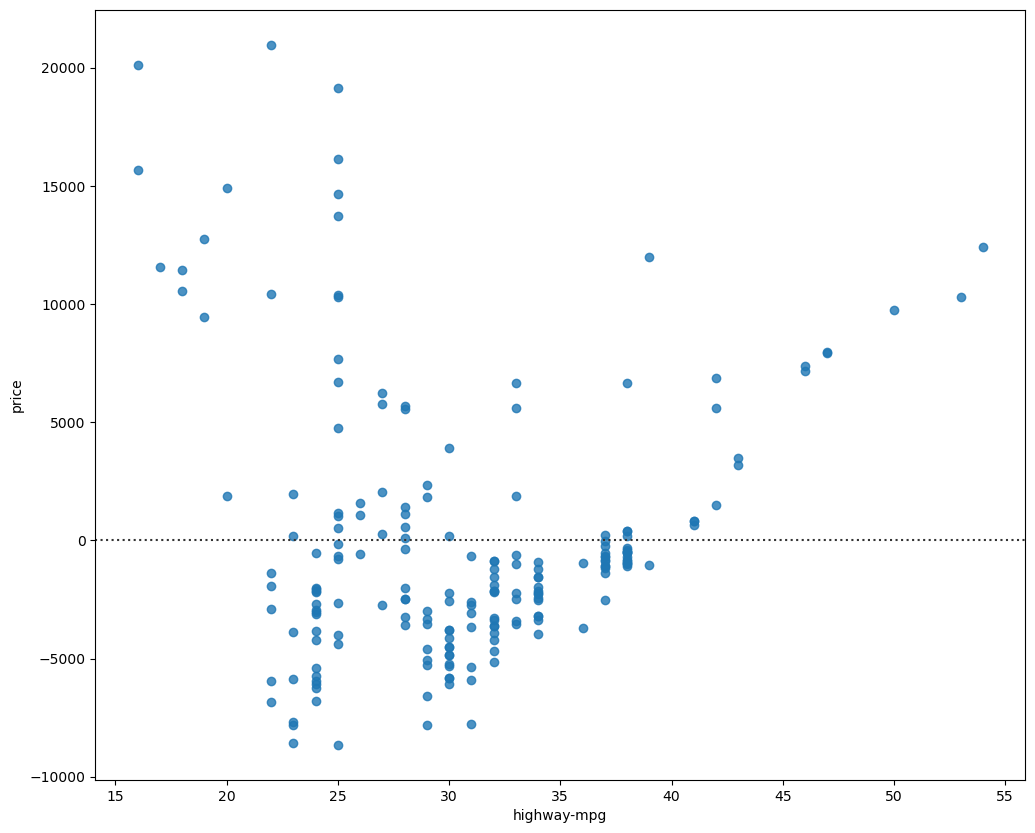

In [31]:
plt.figure(figsize=(12,10))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

C:\Users\nidhi\AppData\Local\Temp\ipykernel_1788\241159532.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl=sns.distplot(df['price'],hist=False, color="r",label="Actual Value")
C:\Users\nidhi\AppData\Local\Temp\ipykernel_1788\241159532.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

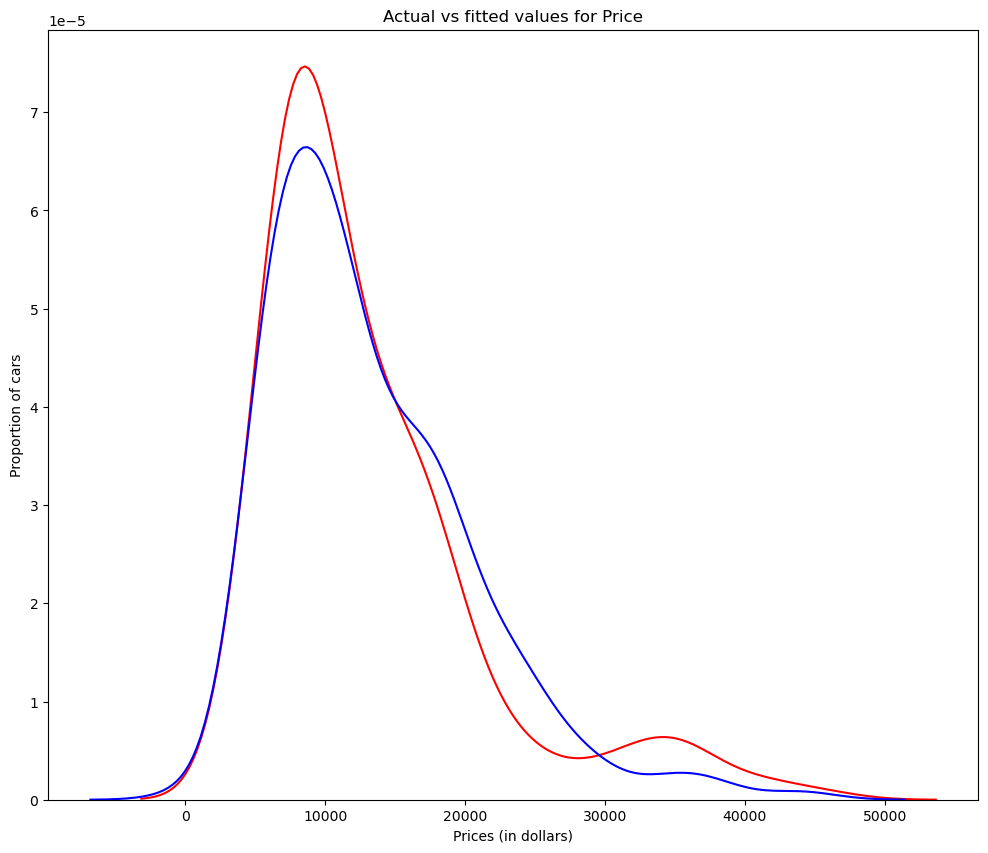

In [32]:
Y_hat=lm2.predict(Z)
plt.figure(figsize=(12,10))
axl=sns.distplot(df['price'],hist=False, color="r",label="Actual Value")
sns.distplot(Y_hat,hist=False, color="b",label="Fitted Value",ax=axl)
plt.title("Actual vs fitted values for Price")
plt.xlabel("Prices (in dollars)")
plt.ylabel("Proportion of cars")
plt.show()
plt.close()

In [33]:
def plotlpoly(model,independent_variable,dependent_variable,Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    plt.plot(independent_variable,dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomial fit with Matplotlib for Price- length')
    ax=plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig=plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of cars")
    plt.show()
    plt.close()
    

In [34]:
x=df['highway-mpg']
y=df['price']
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


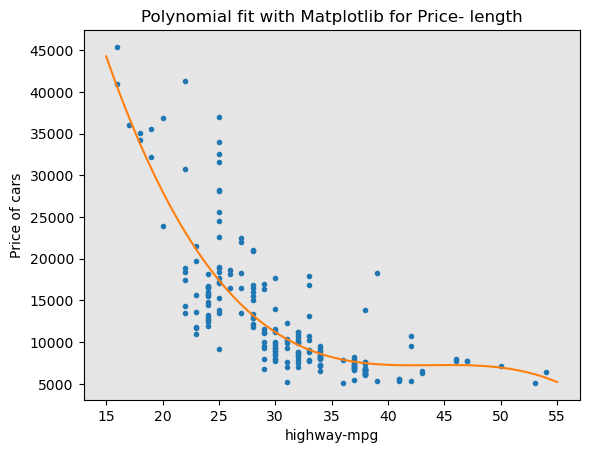

In [35]:
plotlpoly(p,x,y,'highway-mpg')


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


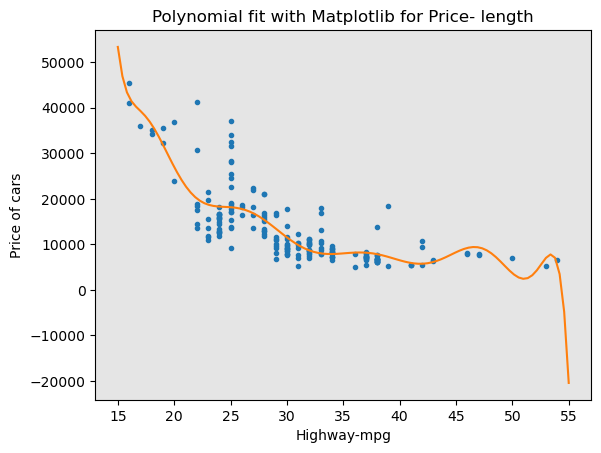

In [36]:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
plotlpoly(p1,x,y,'Highway-mpg')




In [37]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [38]:
Z_pr=pr.fit_transform(Z)

In [39]:
Z.shape

(201, 4)

In [40]:
Z_pr.shape

(201, 15)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [43]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
Z = Z.astype(float)
pipe.fit(Z,y)
#y=df['price']

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
ypipe=pipe.predict(Z)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [46]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [49]:
from sklearn.metrics import mean_squared_error
lm.fit(X,Y)
print("the R- square is: ",lm.score(X,Y))
Yhat=lm.predict(X)
mse=mean_squared_error(df['price'],Yhat)
print("the mean squared error is ",mse)
                    

the R- square is:  0.7609686443622008
the mean squared error is  15021126.02517414
